In [81]:
import sys
sys.path.append('../')

import numpy as np



import os
import matplotlib
import matplotlib.pyplot as plt


import cv2

from scipy import ndimage, fft

import pandas as pd

import scienceplots

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '1000'})

In [82]:
df = pd.read_csv('wandb_export_resnet.csv')

print(df.to_string()) 

   Step  resnet50_6_seed=99 - initial_val_accuracy  resnet50_6_seed=99 - initial_val_accuracy__MIN  resnet50_6_seed=99 - initial_val_accuracy__MAX  resnet50_6_seed=99 - val_accuracy  resnet50_6_seed=99 - val_accuracy__MIN  resnet50_6_seed=99 - val_accuracy__MAX  resnet50_5_seed=99 - initial_val_accuracy  resnet50_5_seed=99 - initial_val_accuracy__MIN  resnet50_5_seed=99 - initial_val_accuracy__MAX  resnet50_5_seed=99 - val_accuracy  resnet50_5_seed=99 - val_accuracy__MIN  resnet50_5_seed=99 - val_accuracy__MAX  resnet50_4_seed=99 - initial_val_accuracy  resnet50_4_seed=99 - initial_val_accuracy__MIN  resnet50_4_seed=99 - initial_val_accuracy__MAX  resnet50_4_seed=99 - val_accuracy  resnet50_4_seed=99 - val_accuracy__MIN  resnet50_4_seed=99 - val_accuracy__MAX  resnet50_2_seed=99 - initial_val_accuracy  resnet50_2_seed=99 - initial_val_accuracy__MIN  resnet50_2_seed=99 - initial_val_accuracy__MAX  resnet50_2_seed=99 - val_accuracy  resnet50_2_seed=99 - val_accuracy__MIN  resnet50_2_seed

In [83]:
results = {}
for i in range(1,7):	
    
	results[i] = []
	results[i].append(df[f'resnet50_{i}_seed=99 - initial_val_accuracy'][0])
	results[i].extend(df[f'resnet50_{i}_seed=99 - val_accuracy__MAX'][1:].values)

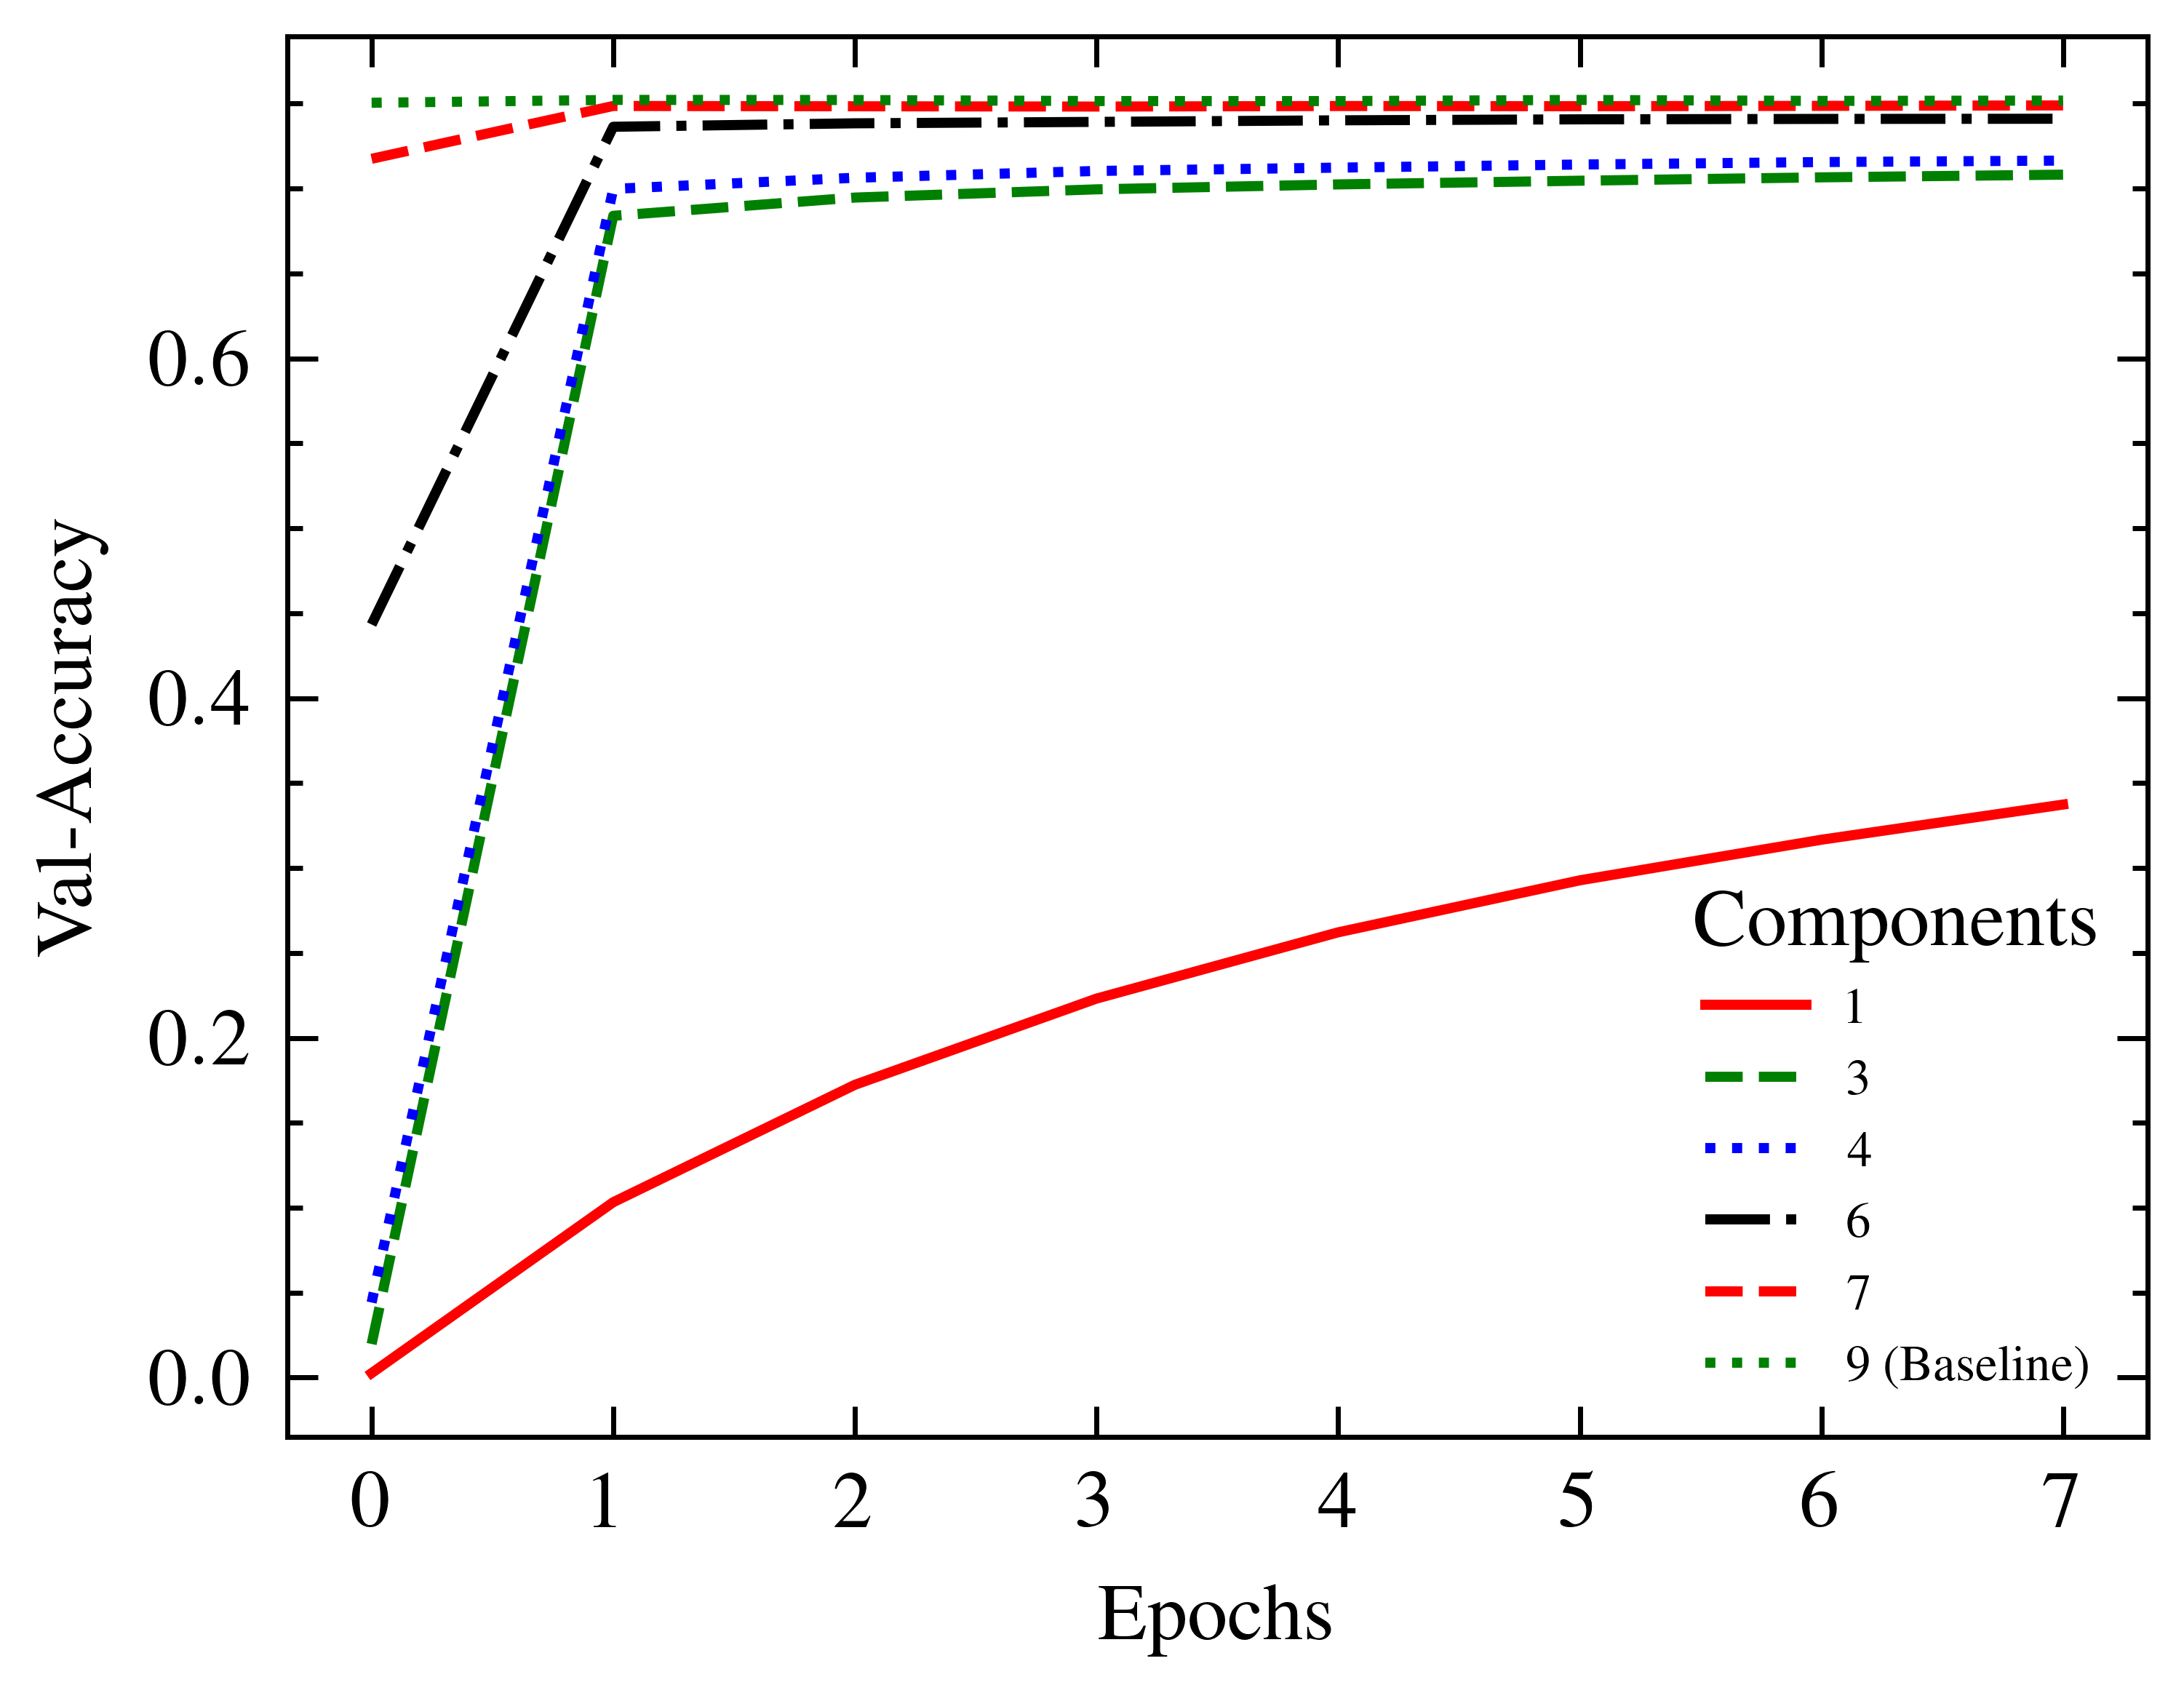

In [84]:
from cycler import cycler

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'k', 'r', 'g']) +
                           cycler('linestyle', ['-', '--', ':', '-.',  '--', ':'])))

xs = range(0, len(results[1]))
markers = ['.', 'v', '^', '<', '>', 's']
f = plt.figure(0) 
for k, v in results.items():  
    ys = v
    plt.plot(xs, ys, label=k, linewidth=1.)

plt.legend(title="Components", labels=['1','3','4','6','7','9 (Baseline)'], facecolor="white", prop = { "size": 5 })
plt.ylabel("Val-Accuracy")
plt.xticks(range(0,len(results[1])))
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='minor', top=False)

plt.xlabel("Epochs")

plt.show()

In [85]:
f.savefig("resnet_dct.pdf", bbox_inches='tight')
